# DATA CLEANING

In [2]:
import pandas as pd
import re
import string

# data1 = pd.read_csv("input/IKN-3.csv")
# data2 = pd.read_csv("input/IKN.csv")
# data3 = pd.read_csv("input/IKN-1.csv")
# data4 = pd.read_csv("input/data-exc.csv")
# data5 = pd.read_csv("input/IKN-ss.csv")

# data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
# data.fillna(1, inplace=True)
# data_filtered = data[['full_text']]
# print(data_filtered)

In [6]:
data = pd.read_excel('output/data-tweet.xlsx')
data.head()

,No.,Sentimen,Tweet
0,1,Positif,b'RT @AlshaibaShihab: Indonesia ditangan Presi...
1,2,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...
2,3,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...
3,4,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...
4,5,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...


In [7]:
data.shape

(2177, 3)

In [8]:
data_cleaned = data.drop_duplicates(subset=['tweet'])
print(data_cleaned.shape)

KeyError: Index(['tweet'], dtype='object')

# TRANSLATE

In [9]:
from googletrans.client import Translator
translator = Translator()

data_cleaned['translated'] = data_cleaned['tweet'].str.encode('ascii', 'ignore').apply(translator.translate, src='id', dest='en')
data_cleaned.head()

AttributeError: module 'httpcore' has no attribute 'SyncHTTPTransport'

In [7]:
def clean_tweet2(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

data_cleaned['translated'] = data_cleaned['translated'].apply(getattr, args=('text',))
data_cleaned['translated'] = data_cleaned.apply(lambda x: clean_tweet2(x['translated']), axis=1)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_11836\931082115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['translated'] = data_cleaned['translated'].apply(getattr, args=('text',))
C:\Users\Bryant\AppData\Local\Temp\ipykernel_11836\931082115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['translated'] = data_cleaned.apply(lambda x: clean_tweet2(x['translated']), axis=1)


In [8]:
def clean_text(text):
    # Hapus mention (@username) menggunakan regex
    text = re.sub(r'@\w+', '', text)
    # Hapus hashtag (#hashtag) menggunakan rege
    text = re.sub(r'#\w+', '', text)
    # Hapus URL menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Hapus emoji menggunakan regex
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]+', '', text)
    # Hapus semua tanda baca menggunakan regex
    # text = re.sub(r'[^\w\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text


In [9]:
data_cleaned['cleaned'] = data_cleaned['translated'].apply(clean_text)
data_cleaned.head(10)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_11836\3483948954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned'] = data_cleaned['translated'].apply(clean_text)


,full_text,username,created_at,translated,cleaned
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,b These are the 2 units of Landed Houses for M...,b These are the 2 units of Landed Houses for M...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,b Alhamdulillah thank you for visiting the Ind...,b Alhamdulillah thank you for visiting the Ind...
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,b Observers Criticize 2 Projects Owned by Cong...,b Observers Criticize 2 Projects Owned by Cong...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,b Wow Seen from the roadside The towering buil...,b Wow Seen from the roadside The towering buil...
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,b When droned on the roll off of a PLN transfo...,b When droned on the roll off of a PLN transfo...
6,Usulan DPR tak Ikut Pindah ke IKN Nusantara Di...,tribunkaltim,Wed Mar 27 03:18:10 +0000 2024,b DPR s proposal not to take part in moving to...,b DPR s proposal not to take part in moving to...
7,Suasana Proyek Pembangunan Bandara VVIP IKN ap...,MitraIKN,Wed Mar 27 02:48:24 +0000 2024,b The atmosphere of the VVIP IKN Airport Devel...,b The atmosphere of the VVIP IKN Airport Devel...
8,Investasi di IKN Nusantara Dinilai Tidak Mengu...,tribunkaltim,Tue Mar 26 23:39:00 +0000 2024,b Investment in IKN Nusantara is considered no...,b Investment in IKN Nusantara is considered no...
9,Inilah Hunian ASN 4 yang mana pembangunan nya ...,RobieMrg,Tue Mar 26 13:56:24 +0000 2024,b This is the ASN 4 Residence where constructi...,b This is the ASN 4 Residence where constructi...
10,Investasi di IKN Nusantara Dinilai Tidak Mengu...,tribunkaltim,Tue Mar 26 11:47:44 +0000 2024,b Investment in IKN Nusantara is considered no...,b Investment in IKN Nusantara is considered no...


# TEXT PREPROCESSING

In [5]:
import pandas as pd

data_cleaned = pd.read_csv('output/dataset.csv')
data_cleaned

,cleared_translate
0,This is a house unit on the ministerial office...
1,Alhamdulillah thank you Mr Rudi and Jajar for ...
2,Very critical of the conglomerates project to ...
3,wow look at the roadside of the high rise buil...
4,when youre driving a drone roll off the PLN tr...
...,...
2267,IKN authorities speed up private investment lo...
2268,Indonesias pocket of Japans IKN investment com...
2269,My order is to prepare tax facilities for all ...
2270,The final day of voting for the IKN Nusantara ...


# CASE FOLDING

In [6]:
def preprocess_text(text):
  #ubah kalimat jadi huruf kecil
  lower_case = text.lower()
  #hapus angka dari kalimat
  result = re.sub(r"\d+", "", lower_case)
  #hapus tanda baca dari kalimat
  result = result.translate(str.maketrans("","",string.punctuation + "!!"))
  #hapus spasi awal & akhir kalimat
  result = result.strip()
  return result

In [7]:
data_cleaned['case_fold'] = data_cleaned['cleared_translate'].apply(preprocess_text)
data_cleaned.head()

,cleared_translate,case_fold
0,This is a house unit on the ministerial office...,this is a house unit on the ministerial office...
1,Alhamdulillah thank you Mr Rudi and Jajar for ...,alhamdulillah thank you mr rudi and jajar for ...
2,Very critical of the conglomerates project to ...,very critical of the conglomerates project to ...
3,wow look at the roadside of the high rise buil...,wow look at the roadside of the high rise buil...
4,when youre driving a drone roll off the PLN tr...,when youre driving a drone roll off the pln tr...


# TOKENIZING

In [8]:
import nltk
nltk.download ('all')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

data_cleaned['token'] = data_cleaned['case_fold'].apply(tokenize_text)
data_cleaned.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data] 

,cleared_translate,case_fold,token
0,This is a house unit on the ministerial office...,this is a house unit on the ministerial office...,"[this, is, a, house, unit, on, the, ministeria..."
1,Alhamdulillah thank you Mr Rudi and Jajar for ...,alhamdulillah thank you mr rudi and jajar for ...,"[alhamdulillah, thank, you, mr, rudi, and, jaj..."
2,Very critical of the conglomerates project to ...,very critical of the conglomerates project to ...,"[very, critical, of, the, conglomerates, proje..."
3,wow look at the roadside of the high rise buil...,wow look at the roadside of the high rise buil...,"[wow, look, at, the, roadside, of, the, high, ..."
4,when youre driving a drone roll off the PLN tr...,when youre driving a drone roll off the pln tr...,"[when, youre, driving, a, drone, roll, off, th..."


# FILTERING (STOPWORD REMOVAL)

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stopwords_set = set(stopwords.words('english'))
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_set:
      cleaned_tokens.append(token)
  return cleaned_tokens

data_cleaned['stop'] = data_cleaned['token'].apply(stopword_text)
data_cleaned.head()

,cleared_translate,case_fold,token,stop
0,This is a house unit on the ministerial office...,this is a house unit on the ministerial office...,"[this, is, a, house, unit, on, the, ministeria...","[house, unit, ministerial, office, site, compl..."
1,Alhamdulillah thank you Mr Rudi and Jajar for ...,alhamdulillah thank you mr rudi and jajar for ...,"[alhamdulillah, thank, you, mr, rudi, and, jaj...","[alhamdulillah, thank, mr, rudi, jajar, visiti..."
2,Very critical of the conglomerates project to ...,very critical of the conglomerates project to ...,"[very, critical, of, the, conglomerates, proje...","[critical, conglomerates, project, support, in..."
3,wow look at the roadside of the high rise buil...,wow look at the roadside of the high rise buil...,"[wow, look, at, the, roadside, of, the, high, ...","[wow, look, roadside, high, rise, buildings, i..."
4,when youre driving a drone roll off the PLN tr...,when youre driving a drone roll off the pln tr...,"[when, youre, driving, a, drone, roll, off, th...","[youre, driving, drone, roll, pln, transformer..."


# STEMMING

In [11]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [12]:
def stemming_text(tokens):
  result = [ps.stem(token) for token in tokens]
  return result

data_cleaned['stemmed'] = data_cleaned['stop'].apply(stemming_text)
data_cleaned.head()

,cleared_translate,case_fold,token,stop,stemmed
0,This is a house unit on the ministerial office...,this is a house unit on the ministerial office...,"[this, is, a, house, unit, on, the, ministeria...","[house, unit, ministerial, office, site, compl...","[hous, unit, ministeri, offic, site, complet, ..."
1,Alhamdulillah thank you Mr Rudi and Jajar for ...,alhamdulillah thank you mr rudi and jajar for ...,"[alhamdulillah, thank, you, mr, rudi, and, jaj...","[alhamdulillah, thank, mr, rudi, jajar, visiti...","[alhamdulillah, thank, mr, rudi, jajar, visit,..."
2,Very critical of the conglomerates project to ...,very critical of the conglomerates project to ...,"[very, critical, of, the, conglomerates, proje...","[critical, conglomerates, project, support, in...","[critic, conglomer, project, support, indonesi..."
3,wow look at the roadside of the high rise buil...,wow look at the roadside of the high rise buil...,"[wow, look, at, the, roadside, of, the, high, ...","[wow, look, roadside, high, rise, buildings, i...","[wow, look, roadsid, high, rise, build, ikn, a..."
4,when youre driving a drone roll off the PLN tr...,when youre driving a drone roll off the pln tr...,"[when, youre, driving, a, drone, roll, off, th...","[youre, driving, drone, roll, pln, transformer...","[your, drive, drone, roll, pln, transform, lan..."


In [15]:
data_cleaned.to_csv('output/preprocessed_data.csv', index=False)

In [13]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

all_tokens = [token for sublist in data_cleaned['full_text'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

KeyError: 'full_text'

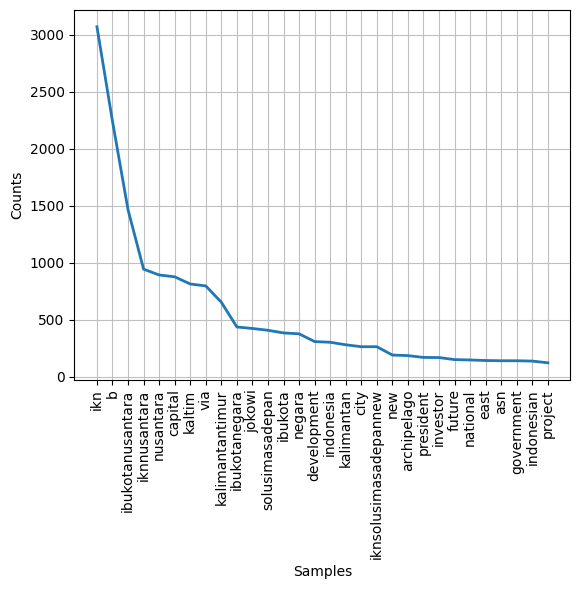

In [ ]:
freq_dist.plot(30, cumulative=False)
plt.show()